In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airline_review.csv')

In [ ]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [ ]:
df.isna().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['Route'][13025]

'Taipei to San Francisco via Incheon'

#Here we want to split the Route to starting point and ending point. As now it is like an entire string

In [ ]:
df.dropna(subset=['Route'],inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
def Route_splitter(route):
  parts=route.split(' ')
  if 'to' not in parts:
    from_=route.split(' ')[0]
    to=route.split(' ')[-1]
  else:
    parts=route.split('to')
    from_=parts[0].strip()
    to=parts[1].strip()
    to_destination=to.split(' ')
    if 'via' in to_destination:
      to=to.split('via')[0]
  return pd.Series({'From':from_,'To':to})

In [ ]:
df[['From','To']]=df['Route'].apply(Route_splitter)

In [ ]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,From,To
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,...,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,Moroni,Moheli
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,...,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,Moroni,Anjouan
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,...,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,Anjouan,Dzaoudzi
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,Frankfurt,Pristina
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Sofia,Amsterdam


In [ ]:
df['Route'][13023]

'Kharkiv to Beirut via Istanbul'

In [ ]:
df['From'][13023]

'Kharkiv'

In [ ]:
df['To'][13023]

'Beirut '

In [ ]:
df.head(-2)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,From,To
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,...,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,Moroni,Moheli
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,...,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,Moroni,Anjouan
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,...,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,Anjouan,Dzaoudzi
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,...,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,Frankfurt,Pristina
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Sofia,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19336,23164,ZIPAIR,1,"""$300 savings was absolutely not worth it""",22nd July 2022,True,My issues started before we even flew. I rec...,NaN,Family Leisure,Economy Class,...,3.0,4.0,1.0,1.0,1.0,2.0,2.0,no,Los Angeles,Narita
19337,23165,ZIPAIR,1,"""worst airline experience ever""",13th July 2022,False,Terrible experience with customer service on...,NaN,Couple Leisure,Business Class,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,Tokyo,Los Angeles
19338,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,...,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no,Bangkok,Tokyo
19339,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,Singapore,Tokyo


In [ ]:
df['Route'][17667]

'Antalya to London via Istanbul'

In [ ]:
df['From'][17667]

'Antalya'

Now we are creating a new dataframe called df1 with our useful columns

In [ ]:
df1=df[['Airline Name','Overall_Rating','Review_Title','Review','Type Of Traveller','Seat Type','Recommended','From','To']]

In [ ]:
df1.head()

,Airline Name,Overall_Rating,Review_Title,Review,Type Of Traveller,Seat Type,Recommended,From,To
0,AB Aviation,9,"""pretty decent airline""",Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,yes,Moroni,Moheli
1,AB Aviation,1,"""Not a good airline""",Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,no,Moroni,Anjouan
2,AB Aviation,1,"""flight was fortunately short""",Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,no,Anjouan,Dzaoudzi
3,Adria Airways,1,"""I will never fly again with Adria""",Please do a favor yourself and do not fly wi...,Solo Leisure,Economy Class,no,Frankfurt,Pristina
4,Adria Airways,1,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,no,Sofia,Amsterdam


In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Airline_Cleaned_Dataset.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df1.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338 entries, 0 to 19337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Name       19338 non-null  object
 1   Overall_Rating     19338 non-null  object
 2   Review_Title       19338 non-null  object
 3   Review             19338 non-null  object
 4   Type Of Traveller  19338 non-null  object
 5   Seat Type          19338 non-null  object
 6   Recommended        19338 non-null  object
 7   From               19338 non-null  object
 8   To                 19338 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [ ]:
df1.isna().sum()

Airline Name         0
Overall_Rating       0
Review_Title         0
Review               0
Type Of Traveller    2
Seat Type            3
Recommended          0
From                 0
To                   0
dtype: int64

In [ ]:
df1.dropna(inplace=True)

<ipython-input-28-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
df1.reset_index(drop=True,inplace=True)

Now our datset is prety good we dealt with the missing values and preprocessed our dataset based on our requirements

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.drop(columns=['Aircraft','Review Date','Aircraft','Date Flown'],inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Verified                      0
Review                        0
Type Of Traveller             2
Seat Type                     3
Route                         0
Seat Comfort               1771
Cabin Staff Service        1876
Food & Beverages           6268
Ground Service             1031
Inflight Entertainment     9903
Wifi & Connectivity       13451
Value For Money               3
Recommended                   0
From                          0
To                            0
dtype: int64

#We want to study and plot the best rated Airlines

In [ ]:
rating_of_aeroplane={}
def Rating_calculator(data):
  if data.iloc[0] not in rating_of_aeroplane:
    rating_of_aeroplane[data.iloc[0]]=[int(data.iloc[1]),1]
  else:
    rating_of_aeroplane[data.iloc[0]][0]+=int(data.iloc[1])
    rating_of_aeroplane[data.iloc[0]][1]+=1

In [ ]:
df.iloc[:,[1,2]].apply(Rating_calculator,axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
19338    None
19339    None
19340    None
19341    None
19342    None
Length: 19343, dtype: object

In [ ]:
rating_of_aeroplane

In [ ]:
for item in rating_of_aeroplane:
  score=rating_of_aeroplane[item]
  avg_rate=0
  if score[1]>25:
    avg_rate=score[0]/score[1]
    rating_of_aeroplane[item]=avg_rate
  else:
    rating_of_aeroplane[item]=avg_rate

In [ ]:
rating_of_aeroplane

In [ ]:
sorted_ratings = sorted(rating_of_aeroplane.items(), key=lambda item: item[1],reverse=True)
top_5_airlines = sorted_ratings[:10]
airline=[]
score=[]
for i in top_5_airlines:
  airline.append(i[0])
  score.append(i[1])

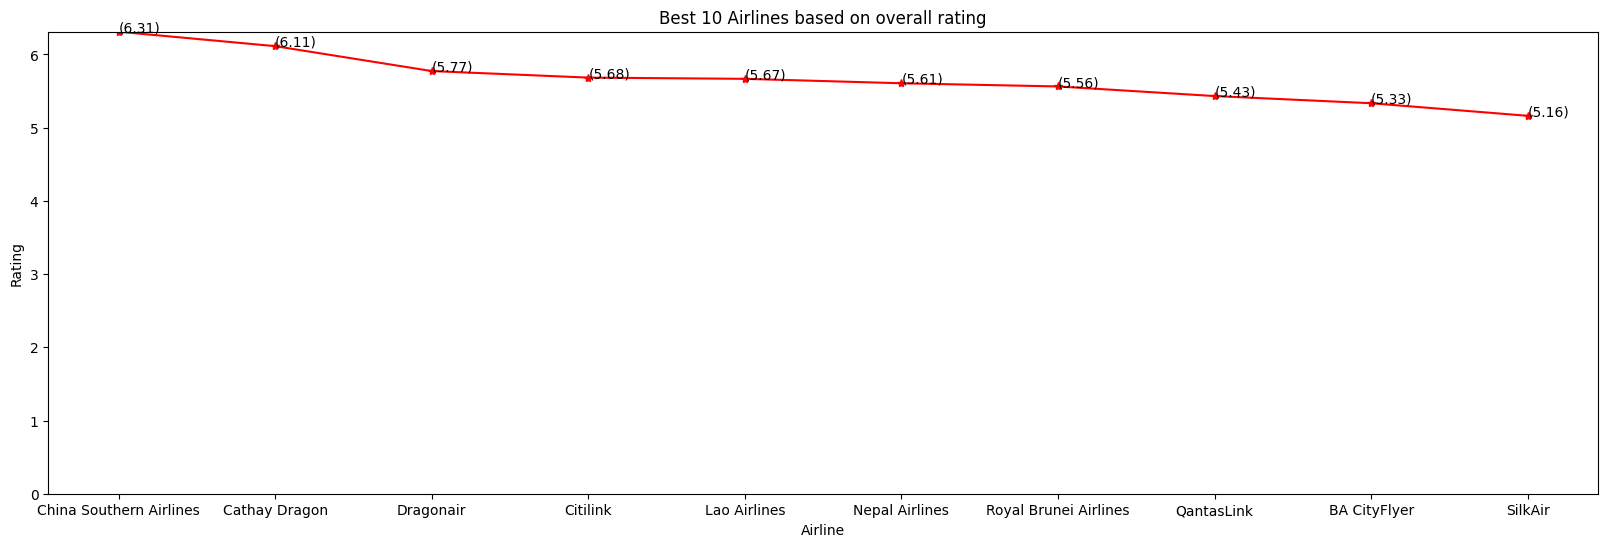

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(airline,score,marker='*',color='red')
plt.ylim(0,max(score))
for i in range(len(airline)):

    plt.text(airline[i], score[i], f'({score[i]:.2f})')
plt.xlabel('Airline')
plt.ylabel('Rating')
plt.title('Best 10 Airlines based on overall rating')
plt.show()

# Findings
1. From the lineplot it is clear that based on the overall rating of the users China Southern Airlines shows the best performance
2. Followed by Cathay Dragon, Dragonair, Citilink, Lao Airlines, Nepal Airlines

# Now we need to find the most recommended airline.

In [ ]:
recomendation_counts=df['Airline Name'][df['Recommended']=='yes'].value_counts()

In [ ]:
recomendation_counts.head()

China Southern Airlines    98
Hainan Airlines            87
ANA All Nippon Airways     78
Garuda Indonesia           73
Bangkok Airways            72
Name: Airline Name, dtype: int64

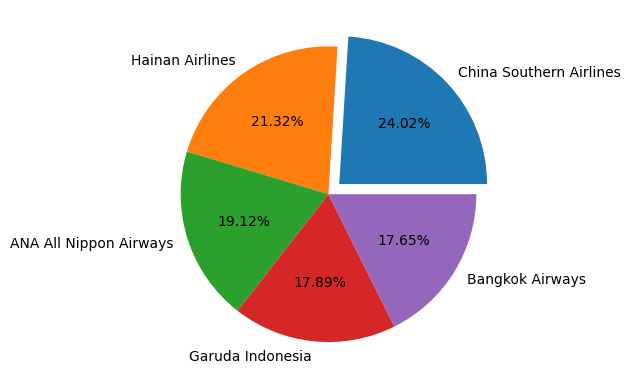

In [ ]:
plt.pie(recomendation_counts.head(),labels=recomendation_counts.head().index,explode=[0.1,0,0,0,0],autopct='%1.2f%%')
plt.show()

# Findings
1. From the pie chart it is clear that most of the users recommended China Southern Airlines
2. Followed by Hanan Airlines, ANA All Nippon Airways

In [ ]:
recomendation_counts.tail()

SkyWork Airlines      1
SkyUp Airlines        1
Skytrans Airlines     1
Grand Cru Airlines    1
AB Aviation           1
Name: Airline Name, dtype: int64

## **Now we can analyse the intrests of different types of travelers**

In [ ]:
df['Type Of Traveller'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure',
       nan], dtype=object)

In [ ]:
rec_counts_Solo_Leisure=df['Airline Name'][(df['Type Of Traveller']=='Solo Leisure') & (df['Recommended']=='yes')].value_counts()

In [ ]:
rec_counts_Solo_Leisure

Hainan Airlines            48
China Southern Airlines    47
Garuda Indonesia           43
Virgin Australia           37
Qatar Airways              36
                           ..
Insel Air                   1
SkyWest Airlines            1
Skytrans Airlines           1
Iraqi Airways               1
AB Aviation                 1
Name: Airline Name, Length: 360, dtype: int64

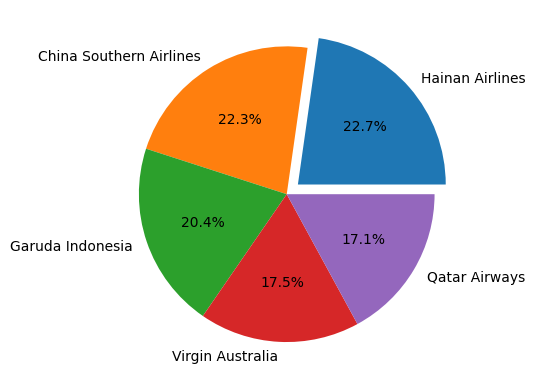

In [ ]:
plt.pie(rec_counts_Solo_Leisure.head(),labels=rec_counts_Solo_Leisure.head().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

# Findings
1.Solo Leisure type of travellers are prefering Hainan Airlines

2.Followed by China Southern Airlines and Garuda Indonesia

# Now I want to know the best things why Solo Leisure type travellers prefer Hainan Airlines

In [ ]:
import nltk,re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def generate_N_grams(text,ngram=1):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  words=[lem.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
from collections import defaultdict
positives=defaultdict(int)
positives

defaultdict(int, {})

In [ ]:
import matplotlib.pyplot as plt
def user_positives(df,airline,traveller):
  positives=defaultdict(int)
  extracted_df=df[(df['Airline Name']==airline) & (df['Type Of Traveller']==traveller) & (df['Recommended']=='yes')]
  for review in extracted_df['Review']:
    for word in generate_N_grams(review,2):
      positives[word]+=1
  positives=pd.DataFrame(sorted(positives.items(),key=lambda x:x[1],reverse=True))
  plt.figure(figsize=(16,7))
  plt.bar(positives[0][:10],positives[1][:10],color='green')

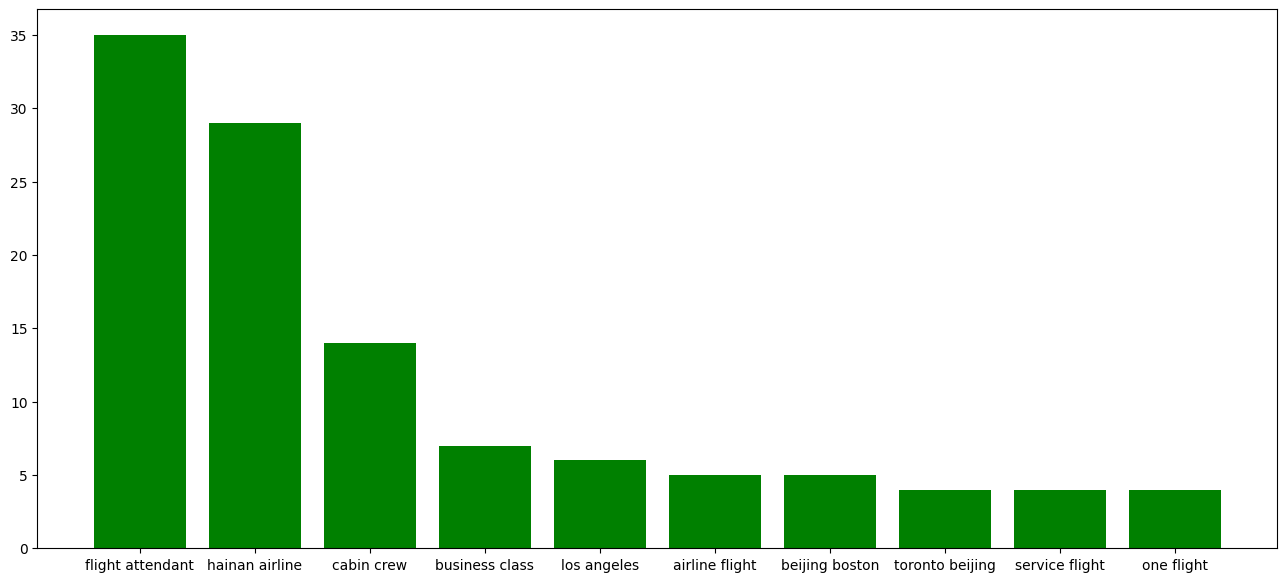

In [ ]:
positives=user_positives(df1,'Hainan Airlines','Solo Leisure')

# **From the bar chart it is clear that the fligh attendats played a very important role in satisfying the customers**

# Now consider Couple Leisure

In [ ]:
rec_counts_Couple_Leisure=df['Airline Name'][(df['Type Of Traveller']=='Couple Leisure') & (df['Recommended']=='yes')].value_counts()

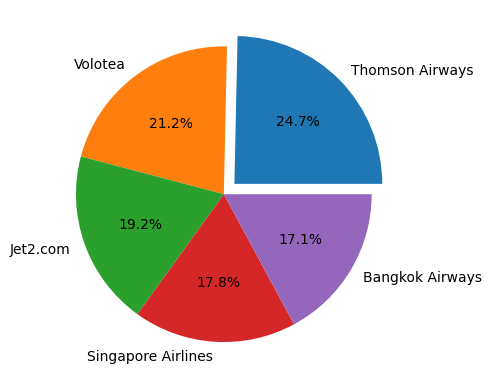

In [ ]:
plt.pie(rec_counts_Couple_Leisure.head(),labels=rec_counts_Couple_Leisure.head().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

# **Findings**
1.Couple Leisure type of travellers are prefering Thomson Airways

2.Followed by China Volotea  and Jet2.com

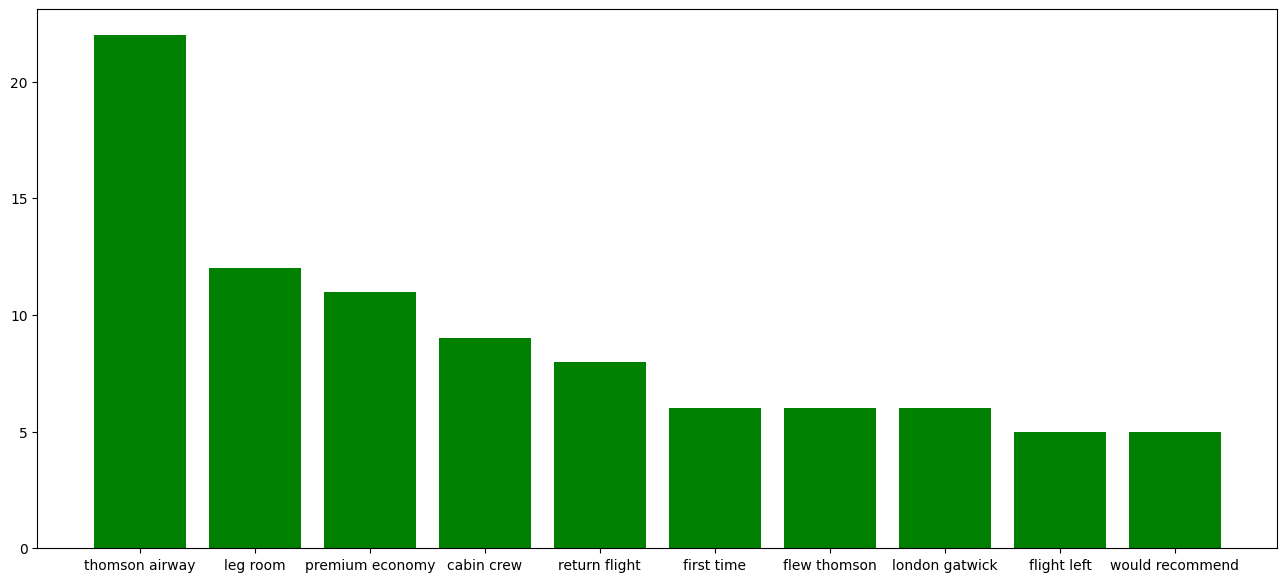

In [ ]:
user_positives(df1,'Thomson Airways','Couple Leisure')

# **From the bar chart it is clear that the leg room, premium economy and cabin crew played a very important role in satisfying the customers of Thomson Airways**

In [ ]:
rec_counts_Business_Leisure=df['Airline Name'][(df['Type Of Traveller']=='Business') & (df['Recommended']=='yes')].value_counts()

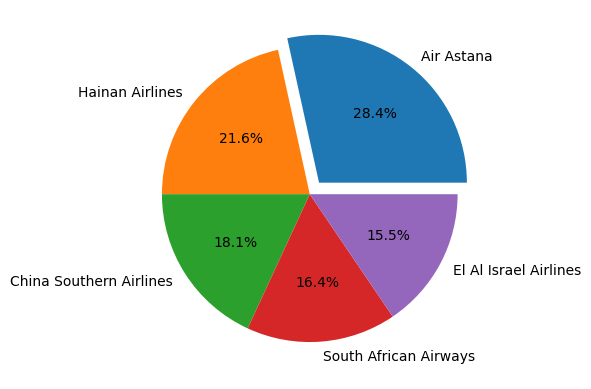

In [ ]:
plt.pie(rec_counts_Business_Leisure.head(),labels=rec_counts_Business_Leisure.head().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

In [ ]:
rec_counts_Family_Leisure=df['Airline Name'][(df['Type Of Traveller']=='Family Leisure') & (df['Recommended']=='yes')].value_counts()

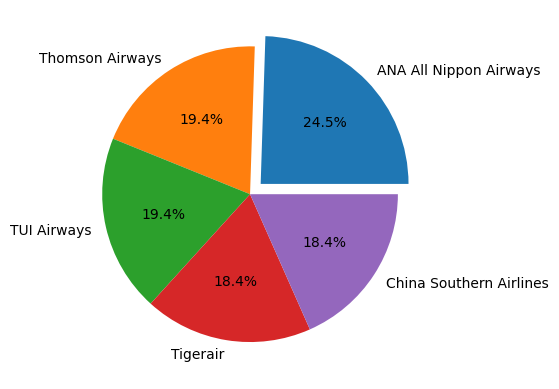

In [ ]:
plt.pie(rec_counts_Family_Leisure.head(),labels=rec_counts_Family_Leisure.head().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

In [ ]:
df['Seat Type'].unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan], dtype=object)

In [ ]:
rec_for_Economy_class=df['Airline Name'][(df['Seat Type']=='Economy Class')&(df['Recommended']=='yes')].value_counts().head()

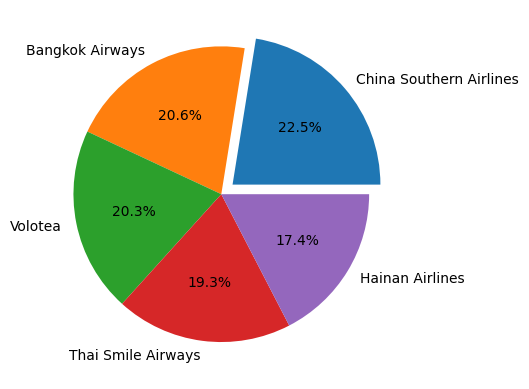

In [ ]:
plt.pie(rec_for_Economy_class,labels=rec_for_Economy_class.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

In [ ]:
rec_for_Business_class=df['Airline Name'][(df['Seat Type']=='Business Class')&(df['Recommended']=='yes')].value_counts().head()

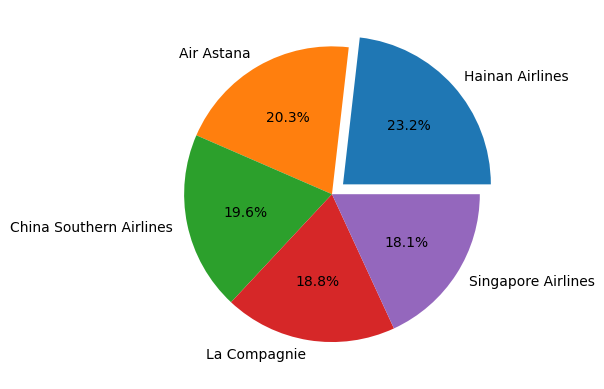

In [ ]:
plt.pie(rec_for_Business_class,labels=rec_for_Business_class.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

In [ ]:
rec_for_Premium_Economy_class=df['Airline Name'][(df['Seat Type']=='Premium Economy')&(df['Recommended']=='yes')].value_counts().head()

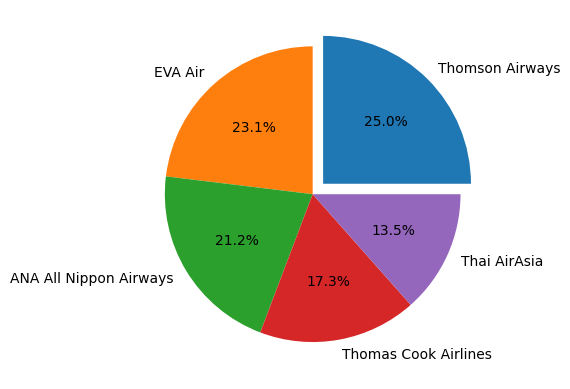

In [ ]:
plt.pie(rec_for_Premium_Economy_class,labels=rec_for_Premium_Economy_class.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

In [ ]:
rec_for_First_class=df['Airline Name'][(df['Seat Type']=='First Class')&(df['Recommended']=='yes')].value_counts().head()

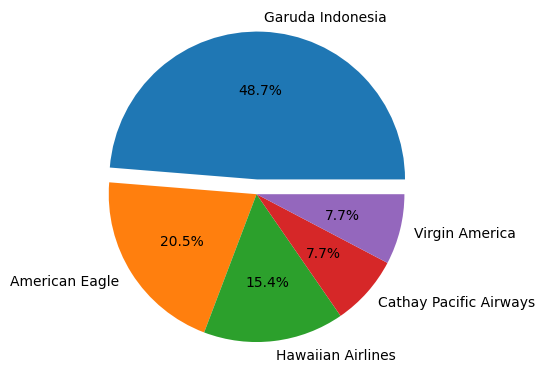

In [ ]:
plt.pie(rec_for_First_class,labels=rec_for_First_class.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.show()

## EDA of Users review

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338 entries, 0 to 19337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Name       19338 non-null  object
 1   Overall_Rating     19338 non-null  object
 2   Review_Title       19338 non-null  object
 3   Review             19338 non-null  object
 4   Type Of Traveller  19338 non-null  object
 5   Seat Type          19338 non-null  object
 6   Recommended        19338 non-null  object
 7   From               19338 non-null  object
 8   To                 19338 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [ ]:
import nltk,re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def generate_N_grams(text,ngram=1):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  words=[lem.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
print(generate_N_grams('The Historical 1998 rises  history the east',2))

['historical rise', 'rise history', 'history east']


In [ ]:
from collections import defaultdict
recommended=defaultdict(int)
not_recommended=defaultdict(int)

In [ ]:
df1['Recommended'].unique()

array(['yes', 'no'], dtype=object)

Now we need to find the words which are common and most frequent in negative and positive reviews

In [ ]:
for i in range(len(df1)):
  if df1['Recommended'][i]=='yes':
    for word in generate_N_grams(df1['Review'][i]):
      recommended[word]+=1
  else:
    for word in generate_N_grams(df1['Review'][i]):
      not_recommended[word]+=1


In [ ]:
df_recommended=pd.DataFrame(sorted(recommended.items(),key=lambda x:x[1],reverse=True))
df_not_recommended=pd.DataFrame(sorted(not_recommended.items(),key=lambda x:x[1],reverse=True))

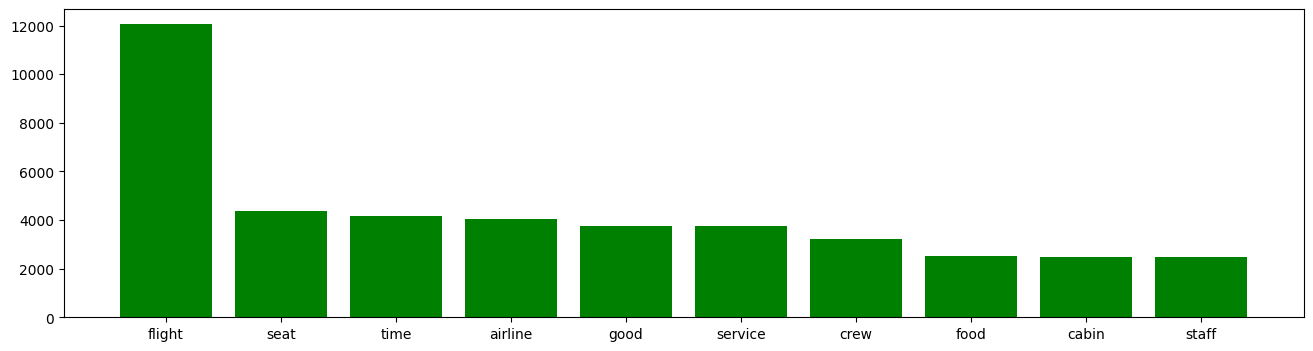

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(df_recommended[0][:10],df_recommended[1][:10],color='green')
plt.show()

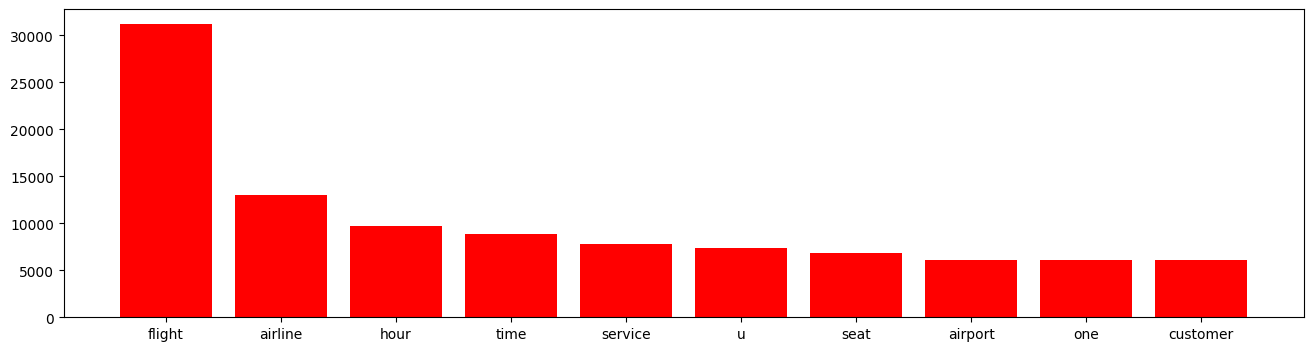

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(df_not_recommended[0][:10],df_not_recommended[1][:10],color='red')
plt.show()

In [ ]:
recommended2=defaultdict(int)
not_recommended2=defaultdict(int)

In [ ]:
for i in range(len(df1)):
  if df1['Recommended'][i]=='yes':
    for word in generate_N_grams(df1['Review'][i],2):
      recommended2[word]+=1
  else:
    for word in generate_N_grams(df1['Review'][i],2):
      not_recommended2[word]+=1

In [ ]:
df_recommended2=pd.DataFrame(sorted(recommended2.items(),key=lambda x:x[1],reverse=True))
df_not_recommended2=pd.DataFrame(sorted(not_recommended2.items(),key=lambda x:x[1],reverse=True))
recommended2


defaultdict(int,
            {'moroni moheli': 1,
             'moheli turned': 1,
             'turned pretty': 1,
             'pretty decent': 10,
             'decent airline': 12,
             'airline online': 3,
             'online booking': 28,
             'booking worked': 1,
             'worked well': 39,
             'well checkin': 1,
             'checkin boarding': 3,
             'boarding fine': 8,
             'fine plane': 1,
             'plane looked': 14,
             'looked well': 5,
             'well maintained': 61,
             'maintained short': 1,
             'short flight': 329,
             'flight minute': 51,
             'minute expect': 2,
             'expect much': 27,
             'much still': 2,
             'still managed': 11,
             'managed hand': 2,
             'hand bottle': 1,
             'bottle water': 99,
             'water biscuit': 2,
             'biscuit though': 1,
             'though nice': 3,
             'nice fli

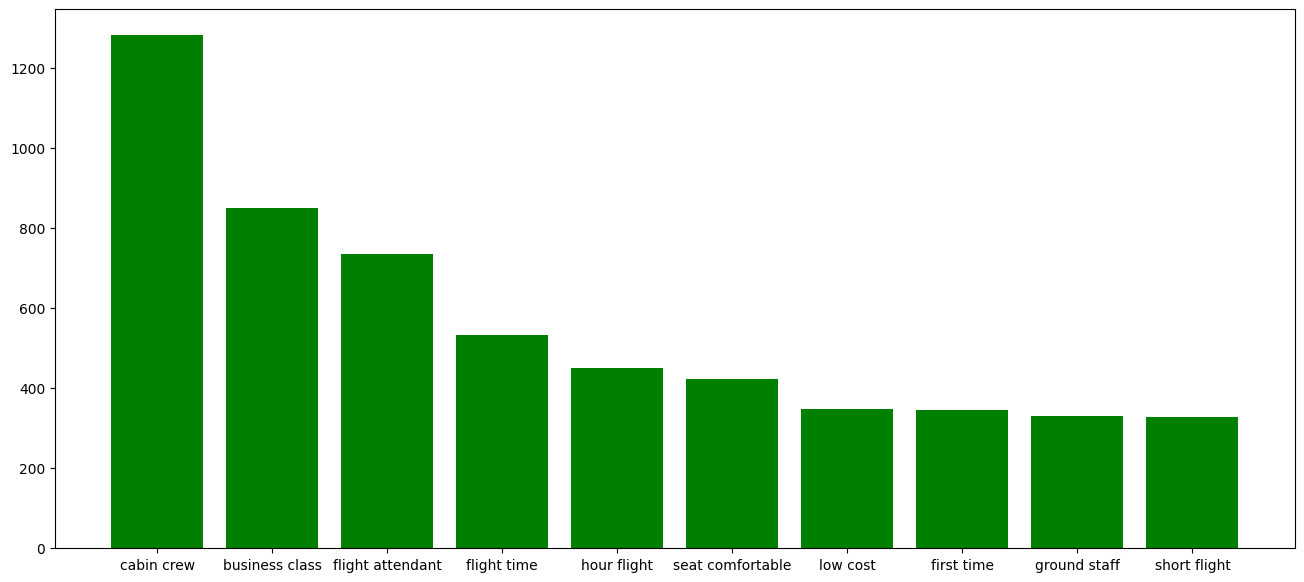

In [ ]:
plt.figure(figsize=(16,7))
plt.bar(df_recommended2[0][:10],df_recommended2[1][:10],color='green')
plt.show()

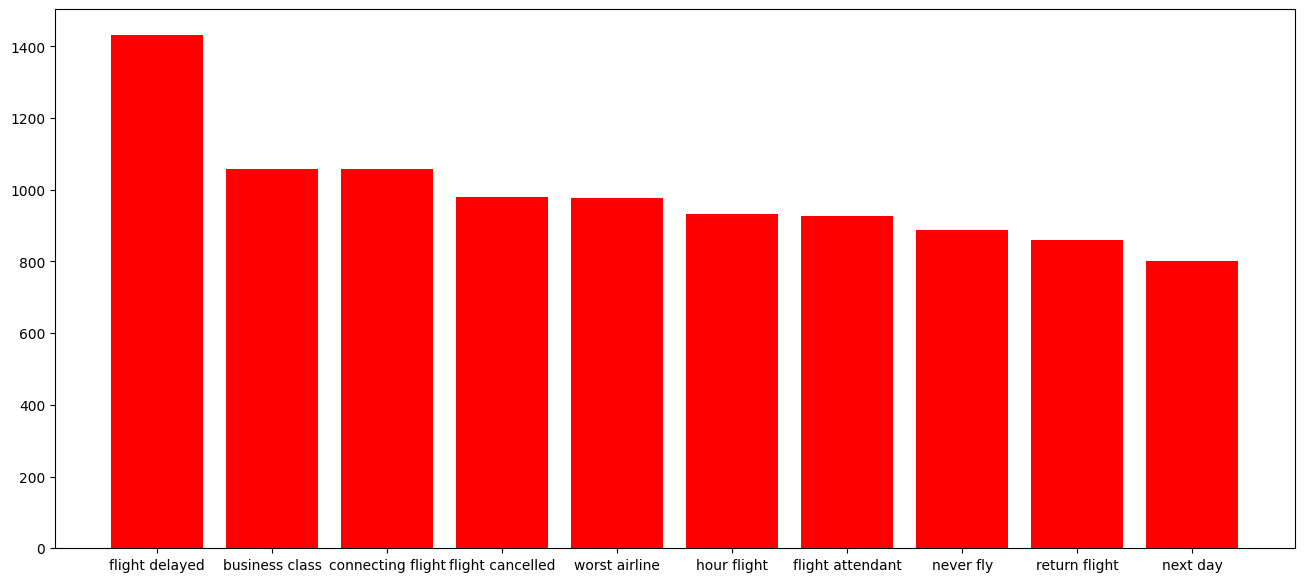

In [ ]:
plt.figure(figsize=(16,7))
plt.bar(df_not_recommended2[0][1:11],df_not_recommended2[1][1:11],color='red')
plt.show()

In [ ]:
from_=list(df1['From'].unique())
to=list(df1['To'].unique())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19338 entries, 0 to 19337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline Name       19338 non-null  object
 1   Overall_Rating     19338 non-null  object
 2   Review_Title       19338 non-null  object
 3   Review             19338 non-null  object
 4   Type Of Traveller  19338 non-null  object
 5   Seat Type          19338 non-null  object
 6   Recommended        19338 non-null  object
 7   From               19338 non-null  object
 8   To                 19338 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [ ]:
recommended3=defaultdict(int)
not_recommended3=defaultdict(int)

In [ ]:
for i in range(len(df1)):
  if df1['Recommended'][i]=='yes':
    for word in generate_N_grams(df1['Review'][i],3):
      recommended3[word]+=1
  else:
    for word in generate_N_grams(df1['Review'][i],3):
      not_recommended3[word]+=1

In [ ]:
df_recommended3=pd.DataFrame(sorted(recommended3.items(),key=lambda x:x[1],reverse=True))
df_not_recommended3=pd.DataFrame(sorted(not_recommended3.items(),key=lambda x:x[1],reverse=True))


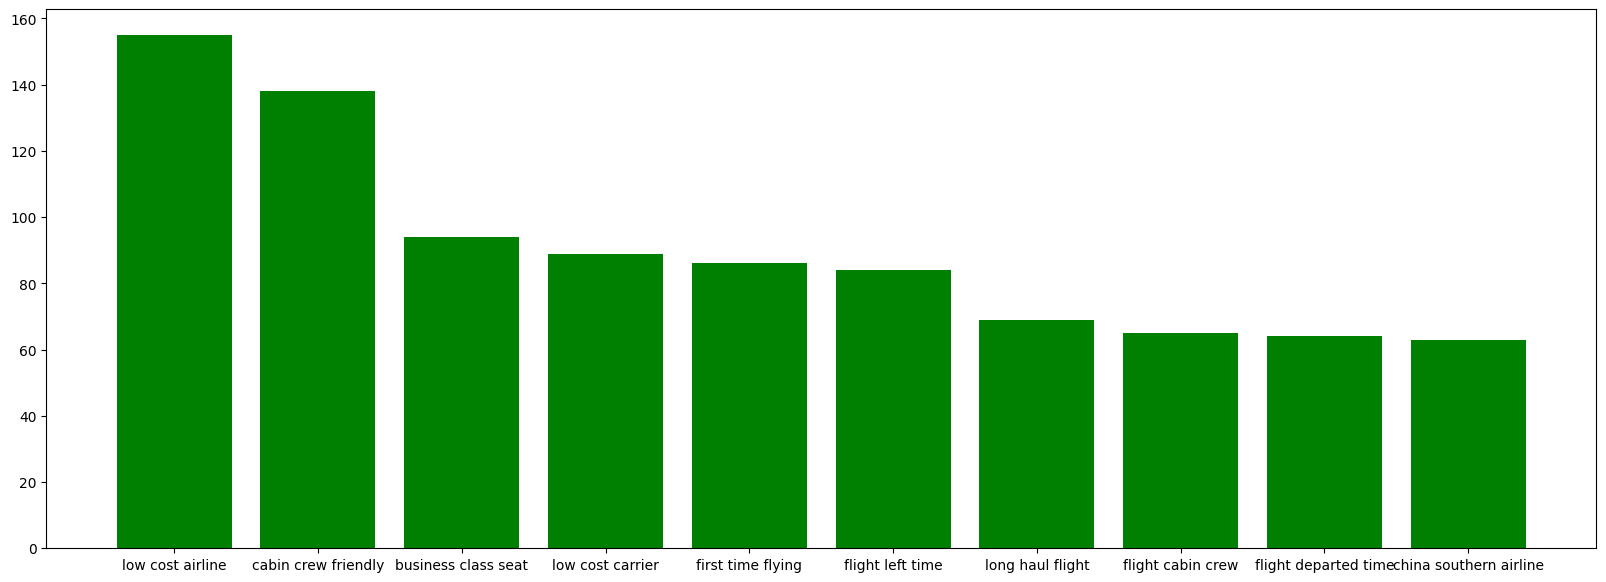

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(df_recommended3[0][:10],df_recommended3[1][:10],color='green')
plt.show()

# Findings
1. Customers are happy with the low cost, friendly cabin crew, business class seat etc.

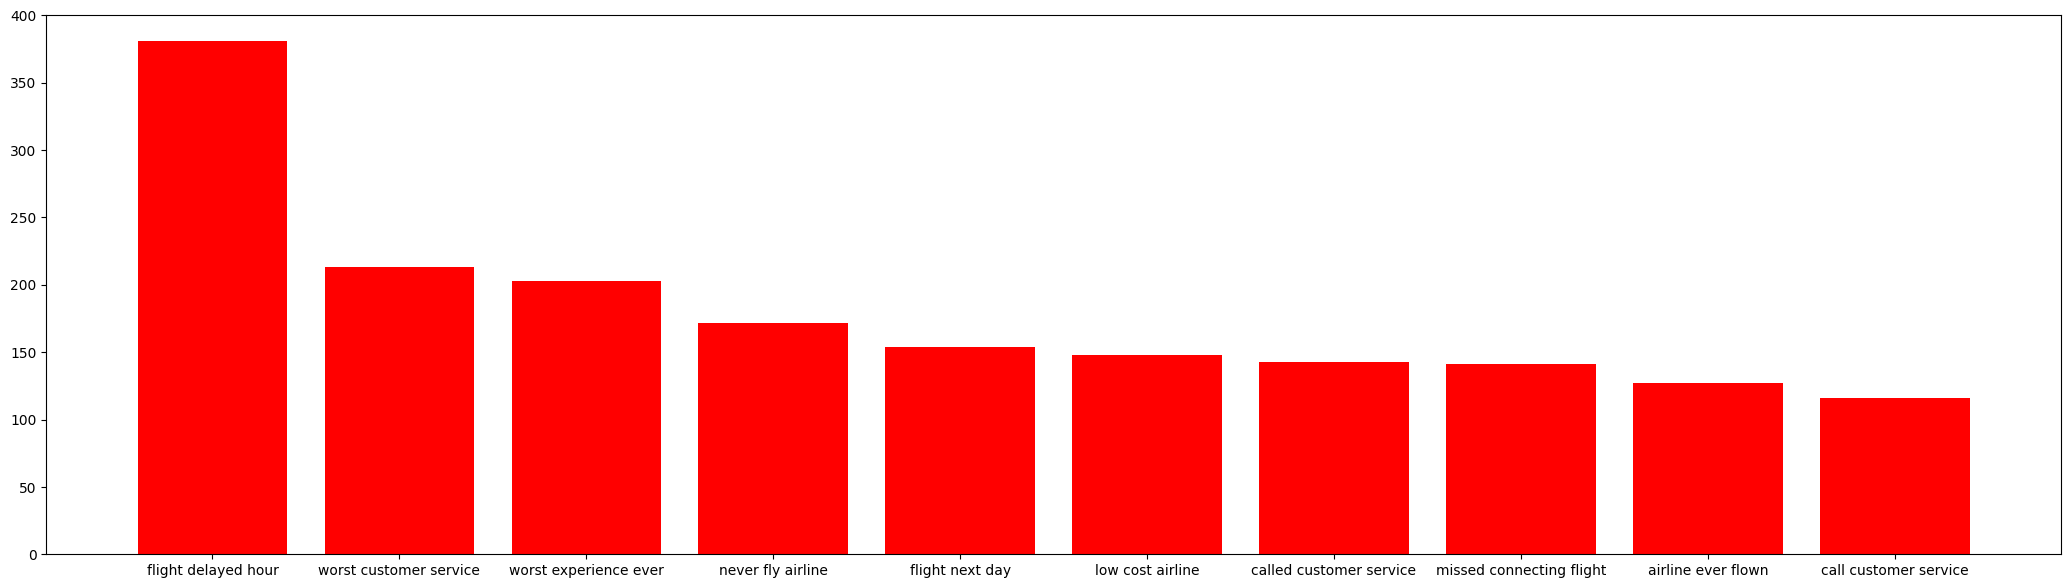

In [ ]:
plt.figure(figsize=(26,7))
plt.bar(df_not_recommended3[0][1:11],df_not_recommended3[1][1:11],color='red')
plt.show()

# Findings
1. Airline company need to work on the delay in flight time, customer service to make the customers happy